## Chapter 3. Statistial Experiments and Significance Testing

필요한 패키지들을 먼저 설치해줍니다.




In [3]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

데이터를 불러오기 위한 경로를 설정합니다. 반드시 필요한 csv 파일이 경로 상에 위치해야 파일을 불러올 수 있습니다.

In [4]:
DATA = "C:/Users/jmjwj/workspace/HD"
WEB_PAGE_DATA_CSV= DATA + '/web_page_data.csv'

### < Two group comparison >


In [5]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

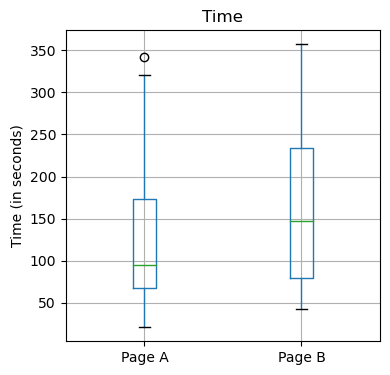

In [6]:
#현 상황 : webpage 를 A/B test 하는 과정
#page별 time의 분포를 확인해보자

ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')


plt.suptitle('')
plt.tight_layout()
plt.show()

In [7]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
observed_diff = mean_b - mean_a
print(observed_diff)

35.66666666666667


페이지 간 머문 시간의 평균 차이는 있는 것으로 보인다.

그렇다면, 이 평균 차이가 통계적으로 유의할까?
이를 위해 permutation test를 시행해보자.

### permutation test

In [8]:
# Permutation test example with stickiness

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = random.sample(range(n), nB)
    idx_A = list(set(range(n)) - set(idx_B))
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]

print(perm_fun(session_times.Time, nA, nB))

-27.419047619047618


In [9]:
#위에서 구한 perm_fun을 이용해, permutation test를 실시한다.
random.seed(1)

perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)] 

print(np.mean(np.array(perm_diffs) > observed_diff))

0.121


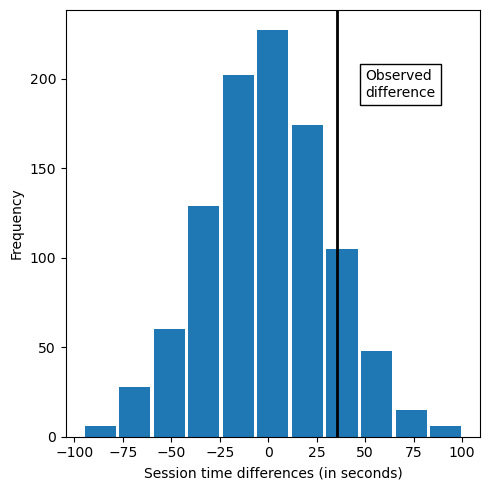

In [10]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = observed_diff, color='black', lw=2)

#customizing
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
